In [10]:
from sklearn.datasets import make_classification, make_circles
import numpy as np

In [11]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [76]:
# X,y=make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, 
#                         class_sep=0.9, random_state=None)
X, y = make_circles(
    n_samples=1000,      # Total number of samples
    noise=0.05,          # Noise level to add some randomness
    factor=0.3,          # Controls the size of the inner circle
    random_state=42      # Ensures reproducibility
)

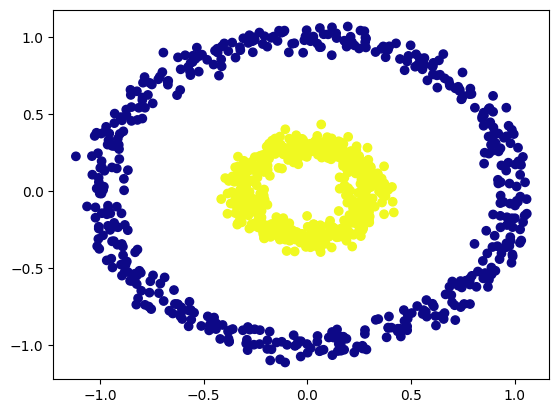

In [77]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma')
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=121)
print(X_train.shape, X_test.shape)

(800, 2) (200, 2)


In [79]:
# Train model Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [5,10,15,20,25,30,40,50,100,150,200],
    "weights": ['uniform', 'distance'],
}
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator = knn, 
                       param_grid = param_grid, 
                       cv = 10, 
                       verbose=2, 
                       n_jobs = -1)
knn_grid.fit(X_train,y_train)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30, 40, 50, 100,
                                         150, 200],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [80]:
# Predict using model Knn
print(knn_grid.best_params_)
print(knn_grid.best_score_)
knn_grid.score(X_test, y_test)

{'n_neighbors': 5, 'weights': 'uniform'}
1.0


1.0

In [81]:
# Train model SVM
from sklearn.svm import SVC
svc = SVC()
param_grid_svc = {
    "C": np.arange(0, 0.2, 0.01).tolist(),
    "kernel": ['rbf','poly','sigmoid','linear'],
    # "kernel": ['rbf','poly'],
    "degree": [1,2,3,4],
    "gamma": ['scale','auto']
}
svc_grid =  GridSearchCV(estimator = svc, 
                       param_grid = param_grid_svc, 
                       cv = 10, 
                       verbose=2, 
                       n_jobs = -1)
svc_grid.fit(X_train,y_train)


Fitting 10 folds for each of 640 candidates, totalling 6400 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
                               0.16, 0.17, 0.18, 0.19],
                         'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [82]:
print(svc_grid.best_score_)
print(svc_grid.best_params_)


1.0
{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [83]:
# Test model svm
svc_grid.score(X_test, y_test)

1.0

In [84]:
# Train model decision tree
from sklearn.tree import DecisionTreeClassifier
dcc = DecisionTreeClassifier()
# param_grid_dcc = {
#     "criterion": ['gini', 'entropy','log_loss'],
#     "splitter": ['best','random'],
#     "max_depth": [i for i in range(11)],
#     "min_samples_split": [i for i in range(5,20)],
#     "max_features": [1,2],
#     "min_impurity_decrease": np.arange(0,2,0.01).tolist(),
# }

param_grid_dcc2 = {
    "criterion": ['gini'],
    "splitter": ['best','random'],
    "max_depth": [i for i in range(1,6)],
    "min_samples_split": [i for i in range(20,30)],
    "max_features": [1,2],
    "min_impurity_decrease": np.arange(0.01,1.1,0.1).tolist(),
}


from sklearn.model_selection import RandomizedSearchCV

# dcc_grid = RandomizedSearchCV(estimator = dcc, 
#                        param_distributions = param_grid_dcc, 
#                        cv = 5, 
#                        verbose=2, 
#                        n_jobs = -1)

dcc_grid = GridSearchCV(estimator = dcc, 
                       param_grid = param_grid_dcc2, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
    

In [85]:
dcc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 2200 candidates, totalling 11000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2],
                         'min_impurity_decrease': [0.01, 0.11,
                                                   0.21000000000000002,
                                                   0.31000000000000005,
                                                   0.41000000000000003, 0.51,
                                                   0.6100000000000001,
                                                   0.7100000000000001, 0.81,
                                                   0.91, 1.01],
                         'min_samples_split': [20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29],
                         'splitter': ['best', 'random']},
             verbose=2)

In [86]:
print(dcc_grid.best_params_)
print(dcc_grid.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 20, 'splitter': 'best'}
0.99


In [87]:
dcc_grid.score(X_test, y_test)

1.0

In [88]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

1.0

In [89]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
param_grid_lgr = {
    'penalty': ['l2','l1','elasticnet'],
    # 'penalty': ['l2'],
    'C':np.arange(0,0.3,0.01).tolist(),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    # 'solver': ['lbfgs', 'saga'],
    'max_iter': [200,500],
    
}
    
lgr_grid = GridSearchCV(estimator = lgr, 
                       param_grid = param_grid_lgr, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.transform(X_test)
lgr_grid.fit(X_train_poly, y_train)

print(lgr_grid.best_params_)
print(lgr_grid.best_score_)


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
{'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
1.0


In [90]:
lgr_grid.score(X_test_poly, y_test)

1.0

In [91]:
clf1=KNeighborsClassifier(n_neighbors= 30, weights= 'uniform')
clf2=SVC(C= 0.11, degree= 1, gamma= 'auto', kernel= 'rbf', probability=True)
clf3=DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_features= 2, min_impurity_decrease= 0.01, min_samples_split= 20, splitter= 'best')
clf4=GaussianNB()
clf5=LogisticRegression(C= 0.1, max_iter= 200,penalty= 'l1', solver= 'liblinear')
estimators = [('knn',clf1),('svc',clf2),('dt',clf3),('nb',clf3),('lr',clf3)]

In [92]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
for estimator in estimators:
    x = cross_val_score(estimator[1],X_train,y_train,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

knn 1.0
svc 1.0
dt 0.99
nb 0.99
lr 0.99


In [93]:
vc = VotingClassifier(estimators=estimators,voting='soft', weights=[3,3.5,0.5,0.5,0.5], n_jobs=-1)
vc.fit(X_train,y_train)
print(vc.score(X_test,y_test))


1.0
